### TASK 1 (BANK MARKETING):

In [3]:
!pip install shap

   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ------------------------------------ - 524.3/545.3 kB 577.4 kB/s eta 0:00:01
   -------------------------------------- 545.3/545.3 kB 566.4 kB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import shap
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

print("Shape of data:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nTarget distribution:\n", df['y'].value_counts())
df.head()

Shape of data: (41188, 21)

Data Types:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Target distribution:
 y
no     36548
yes     4640
Name: count, dtype: int64


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Encode target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Label encode all categorical features
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("Encoding completed.")
df.head()

Encoding completed.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
# Features and Target
X = df.drop('y', axis=1)
y = df['y']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Models trained successfully.")

Models trained successfully.


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.41      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

F1 Score: 0.5112881806108898

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.64      0.53      0.58       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238

F1 Score: 0.5762910798122066


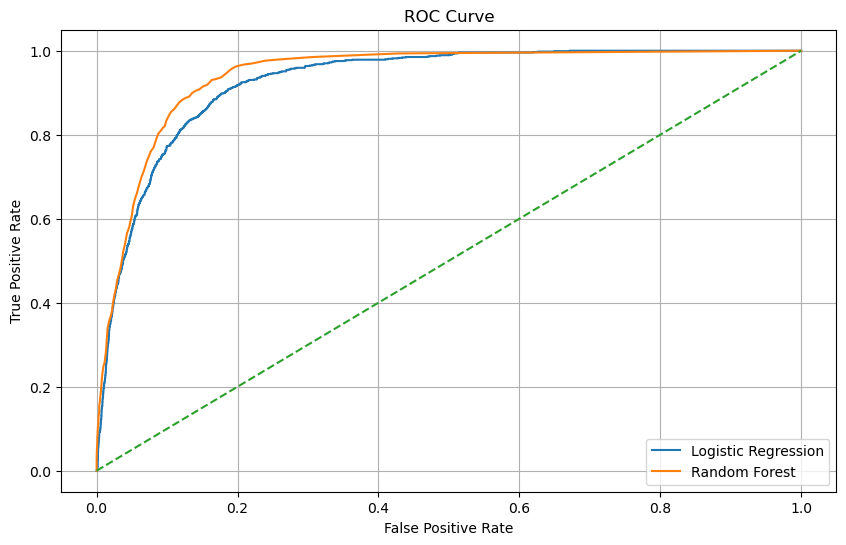

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))

# Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# ROC Curve
y_score_log = log_reg.predict_proba(X_test)[:, 1]
y_score_rf = rf.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_score_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# SHAP requires TreeExplainer for tree models like RF
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Explain 5 random predictions
shap.initjs()
for i in range(5):
    print(f"\n SHAP Explanation for Test Sample #{i+1}")
    shap.force_plot(explainer.expected_value[1], shap_values[1][i], X_test.iloc[i], matplotlib=True)